Three-Phase Connections: 9408
One-Phase Connections: 8284


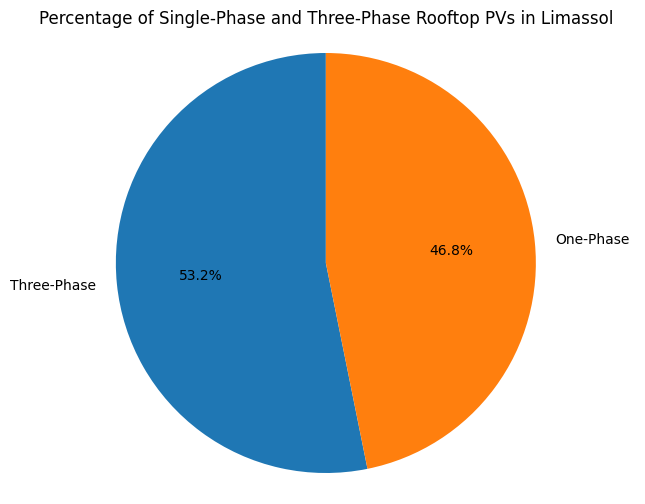

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
import scipy.stats as stats
import seaborn as sns

# Read the specified sheet into a DataFrame
df = pd.read_excel('NET_METERING_Cleaned.xlsx')

# Drop rows where 'Power' or 'Phase' columns have NaN values
df_cleaned = df.dropna(subset=['Power', 'Phase'])

three_phase = len(df_cleaned[df_cleaned['Phase'] == '3Φ'])
one_phase = len(df_cleaned) - three_phase

print('Three-Phase Connections: ' + str(three_phase))
print('One-Phase Connections: ' + str(one_phase))

# Create a pie plot
plt.figure(figsize=(8, 6))
plt.pie([three_phase, one_phase], labels=['Three-Phase', 'One-Phase'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Single-Phase and Three-Phase Rooftop PVs in Limassol')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

In [43]:
one_phase_power = df_cleaned[df_cleaned['Phase'] != '3Φ']['Power']
one_phase_power = pd.to_numeric(one_phase_power, errors='coerce')
one_phase_power.dropna(inplace=True)
one_phase_power[one_phase_power > 500] = one_phase_power[one_phase_power>500]/1000
one_phase_power = one_phase_power[one_phase_power <= 4.2]

# plt.hist(one_phase_power, bins=120, color='skyblue', edgecolor='black')
# plt.title('Histogram of Power for 1-Phase')
# plt.xlabel('Power (kW)')
# plt.ylabel('Frequency')
# plt.grid(axis='y', alpha=0.75)

In [44]:
three_phase_power = df_cleaned[df_cleaned['Phase'] == '3Φ']['Power']
three_phase_power = pd.to_numeric(three_phase_power, errors='coerce')
three_phase_power.dropna(inplace=True)
three_phase_power[three_phase_power > 500] = three_phase_power[three_phase_power>500]/1000
three_phase_power = three_phase_power[three_phase_power <= 10.4]

# plt.hist(three_phase_power, bins=120, color='skyblue', edgecolor='black')
# plt.title('Histogram of Power for 3Φ Phase')
# plt.xlabel('Power')
# plt.ylabel('Frequency')
# plt.grid(axis='y', alpha=0.75)
# plt.show()

In [109]:
# Step 1: Count the frequency of each unique value
value_counts = pd.Series(three_phase_power).value_counts()

# Step 2: Calculate probabilities
values = value_counts.index  # Unique values
probabilities = value_counts / value_counts.sum()  # Normalize counts to probabilities

# Step 3: Randomly select a value based on probabilities
random_value = np.random.choice(values, p=probabilities)

# plt.figure(figsize=(9, 3))
# plt.bar(values,probabilities,width=0.02, color='skyblue', edgecolor='black')

# Export the PMF data to a file 
with open("Three_Phase_PV_PMF_data.txt", "w") as f:
    for x, y in zip(values, probabilities):
        f.write(f"{x} {y}\n")

# print(f"Randomly selected value (weighted by frequency): {random_value}")

In [87]:
# Step 1: Count the frequency of each unique value
value_counts = pd.Series(one_phase_power).value_counts()

# Step 2: Calculate probabilities
values = value_counts.index  # Unique values
probabilities = value_counts / value_counts.sum()  # Normalize counts to probabilities

# Step 3: Randomly select a value based on probabilities
random_value = np.random.choice(values, p=probabilities)


# Export the PMF data to a file 
with open("One_Phase_PV_PMF_data.txt", "w") as f:
    for x, y in zip(values, probabilities):
        f.write(f"{x} {y}\n")
        
# plt.figure(figsize=(9, 3))
# plt.bar(values,probabilities,width=0.02, color='skyblue', edgecolor='black')

# print(f"Randomly selected value (weighted by frequency): {random_value}")